# <center>Classification (Cost-Sensitive): Preventing Credit Card Fraud at Point-of-Sale</center>
<center><img src="./images/credit_card_fraud.jpg" style="height: 350px;"/></center>

# <a id='0'>Contents of Project</a>
<a href='#0.0'>Project Summary</a>
- <a href='#1.0'>1. Dataset</a>
    - <a href='#1.1'>1.1 Dataset Background</a>
    - <a href='#1.2'>1.2 Dataset Attributes</a>
    - <a href='#1.3'>1.3 Dataset Summary</a>
- <a href='#2.0'>2. Business Context of Fraud</a>
    - <a href='#2.1'>2.1 Cost of Fraud</a>
    - <a href='#2.2'>2.2 Misclassification Costs</a>
        - <a href='#2.2.1'>2.2.1 Cost of False Positive</a>
        - <a href='#2.2.2'>2.2.2 Cost of False Negative</a>
    - <a href='#2.3'>2.3 Model Motivation</a>
    - <a href='#2.4'>2.4 Business Context of Fraud Summary</a>
- <a href='#3.0'>3. Exploratory Analysis</a>
    - <a href='#3.1'>3.1 Pearson Correlation Plot</a>
    - <a href='#3.2'>3.2 KDE Plots</a>
- <a href='#4.0'>4. Preprocessing</a>
    - <a href='#4.1'>4.1 Feature Engineering</a>  
    - <a href='#4.2'>4.2 Secondary Exploratory Analysis and Significance Testing</a> 
        - <a href='#4.2.1'>4.2.1 Correlations</a>
        - <a href='#4.2.2'>2.2.1 T Testing</a>
    - <a href='#4.3'>4.3 Dimensionality Reduction</a>
- <a href='#5.0'>5. Modeling</a>
    - <a href='#5.1'>5.1 Cost Function</a>
    - <a href='#5.2'>5.2 Class Weights</a>
    - <a href='#5.3'>5.3 Models</a>
        - <a href='#5.3.1'>5.3.1 Naive Bayes</a>
        - <a href='#5.3.2'>5.3.2 Decision Tree</a>
		- <a href='#5.3.3'>5.3.3 Logistic Regression</a>
		- <a href='#5.3.4'>5.3.4 Support Vector Classifier</a>
		- <a href='#5.3.5'>5.3.5 XGBoost</a>
		- <a href='#5.3.6'>5.3.6 Random Forest</a>
		- <a href='#5.3.7'>5.3.7 Simple Neural Network</a>
		- <a href='#5.3.8'>5.3.8 K Nearest Neighbours</a>
		- <a href='#5.3.9'>5.3.9 AdaBoost</a>
		- <a href='#5.3.10'>5.3.10 Hard Voting Classifier</a>
	- <a href='#5.4'>5.4 Model Summary</a>

# <a id='0.0'> Project Summary</a>

**In this project, I use an openly available dataset of credit card transactions to create a classification model to detect and prevent future fraudelent transactions at point-of-sale.**

**Unlike typical binary classification problems, I <u>do not</u> use performance measures such as [accuracy, precision, recall or AUC](https://en.wikipedia.org/wiki/Confusion_matrix) to evaluate the winnning model. Instead, I take a [cost-sensitive approach](https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/). I contrast the current cost of fraudelent transactions (the "do-nothing" approach) and the costs associated with using a classification model (given that misclassification costs differ, that is to say the cost of allowing a fraudelent transaction through is much higher than preventing and reviewing a legitimate transaction incorrectly flagged as fraudelent - something which standard performance measures do not consider).**

**I consider 10 models, with the winning model (a hyperparameter tuned logistic regression classifier) reducing the cost of fraud from € 30,064/day to € 4,842/day (with model costs considered), a cost-saving amount of 84%.**

# <a id="1">1. Dataset</a>  
## <a id="1.1">1.1 Dataset Background</a>
>The datasets contains transactions made by credit cards in **September 2013** by european cardholders.
This dataset presents transactions that occurred in **two days**, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the positive class (frauds) account for **0.172%** of all transactions.
>
>It contains only numerical input variables which are the result of a **PCA transformation**. 
>
>Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
>* Features **V1**, **V2**, … **V28** are the **principal components** obtained with **PCA**;
>* The only features which have not been transformed with PCA are **'Time'** and **'Amount'**. 
> * Feature **'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 
> * The feature **'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
>* Feature **'Class'** is the response variable and it takes value **1** in case of fraud and **0** otherwise.

(From the Machine Learning Group of Université Libre de Bruxelles) 

## <a id="1.2">1.2 Dataset Attributes</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

np.random.seed(42)
RANDOM_SEED = 42

import os
# for dirname, _, filenames in os.walk('~/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
data_df = pd.read_csv('./input/creditcard.csv')

In [3]:
# Rows and columns of data
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [4]:
# Peak at data
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Summary statistics
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Null values
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <a id="1.3">1.3 Dataset Summary</a>
**31 variables; 284,807 observations; no variable has null values present.**

# <a id="2.">2. Business Context of Fraud</a>

Fraud costs a business money (direct - money lost due to fraudelent transactions being authorised, and indirect - reputational costs). The direct costs are easy to measure and so will therefore be the focus. Indirect costs such as reputational cost is somewhat difficult to calculate and therefore will be excluded from this analysis. Due to this, any cost of fraud given will be a floor (since the indirect costs would add to this).

What is also true, though, is that attempting to prevent fraud also costs a business money; cost of labour to investigate potentially fraudelent transactions ( those transactions flagged by a classfication model as fraudelent).

**It makes sense for a business to try to prevent fraud if the monetary amount of fraud prevented outweighs the cost of investigating potentially-fraudelent transactions.**

## <a id="2.1">2.1 Cost of Fraud</a>

Assuming that the dataset is a representative sample. Across two days, there are 492 fraudelent transactions out of 284,807 transactions.

The average cost of an authorised transaction which turns out to be fraudelent is:

In [7]:
avg_fraud_amt = np.mean(data_df.loc[data_df.Class==1].Amount.values) 
print("Cost of an authorised fraudelent transaction: €",\
      round(avg_fraud_amt, 1))

Cost of an authorised fraudelent transaction: € 122.2


Over a single day this adds up:

In [8]:
print(f'All fraud would on average cost ~ € {round(len(data_df.loc[data_df.Class==1])/2*(avg_fraud_amt),1):,}/ day')

All fraud would on average cost ~ € 30,064.0/ day


This is the "do-nothing" approach, i.e. the baseline. **I will evaluate all classification models against this amount.**

## <a id="2.2">2.2 Misclassification Costs</a>

There are costs associated with misclassifying transactions - no classification model will correctly identify all fraudelent transactions whilst not classifying any legitimate transaction as non-fraudelent.

As such, there are two types of misclassification:
1. Classifying a legitimate transaction as fraudelent (a false positive/type I error).
2. Classifying a fraudelent transaction as legitimate (a false negative/type II error).

Each misclassification has an associated cost.

### <a id="2.2.1">2.2.1 Cost of a False Positive (Type I Error)</a>

To calculate the cost of a false positive (type I error), some assumptions are needed.

The cost associated with a false positive, that is classifying a legitimate transaction as fraudelent, is the cost associated with processing this transaction, by an individual, to determine whether the transaction is indeed fraudelent or not.

It is assumed, therefore:

* All processing is undertaken within the same time-zone, i.e. a European city - most likely a financial district (London, Paris, Dublin, Zurich, Frankfurt).
* Processors are paid an average wage in their respective countries.

* It takes, on average, a processor 5 minutes to determine if a flagged transaction is indeed fraudelent or not.

In [9]:
# 2013 rates, https://www.ofx.com/en-gb/forex-news/historical-exchange-rates/yearly-average-rates/
gbp_eur_fx = 1.177964
chf_eur_fx = 0.812623

# 2013 wages, https://stats.oecd.org/Index.aspx?DataSetCode=AV_AN_WAGE
annual_wages = {
    "United Kingdom": 32636 * gbp_eur_fx,
    "France": 35835,
    "Ireland": 44172,
    "Swtizerland": 87758 * chf_eur_fx,
    "Germany": 36272
}

avg_annual_wages = np.mean(list(annual_wages.values()))
avg_hrly_wage = (avg_annual_wages / 52)/(37.5) # 52 weeks, 37.5 hr/week

transactions_processed_hr = 12 # 60 minutes / 5 minutes per processed transaction

processing_cost_per_transaction = avg_hrly_wage / transactions_processed_hr

In [10]:
print("Cost of processing a transaction: €",\
      round(processing_cost_per_transaction, 1))

Cost of processing a transaction: € 1.9


### <a id="2.2.2">2.2.2 Cost of a False Negative (Type II Error)</a>

The average cost of false negative, flagging a fraduelent transaction as legitimate, is the average cost of a fraudelent transaction, **€122.2**.

## <a id='2.3'>2.3 Model Motivation</a>
So, the cost of a false positive is €1.9 vs €122.2 for a false negative, a ratio of around 1:64.

That means, if 64 transactions are processed and 1 turns out to be fraudelent while the remaining 63 turn out to be legitimate, the business will have saved money:

* Cost to business, expressed as a negative value, of processing 64 transactions: -€1.9 * 64 = -€121.6
* Cost saved, realised as a positive value, by identifying the one legitimate fraud transaction: +€122.2
* Net position: -€121.6 + (+€122.2) = +€0.6

**That is, the business is better off using a classfication model, with its misclassification costs, if and only if the marginal cost of detecting a fraudelent transaction is below 64 transactions misclassified as fraud.**

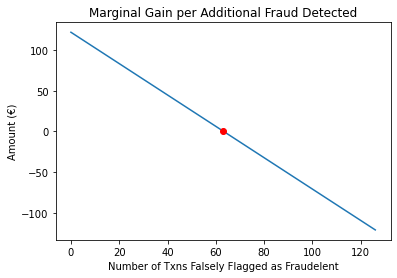

In [11]:
false_positives_count = np.arange(0, avg_fraud_amt / processing_cost_per_transaction * 2)
marginal_cost_function = false_positives_count * - processing_cost_per_transaction + avg_fraud_amt
break_even_txn_count = int(avg_fraud_amt / processing_cost_per_transaction)

plt.title('Marginal Gain per Additional Fraud Detected')
plt.ylabel('Amount (€)')
plt.xlabel('Number of Txns Falsely Flagged as Fraudelent')
plt.plot(marginal_cost_function)
plt.plot(break_even_txn_count, 0, 'ro')
plt.show();

Therefore, a business that uses a classification model that identifies 65 or more legitimate transactions as fraudelent, for every correctly identified fraudelent transaction, will be losing more money to processing transactions than it saves by correctly identifying fraudelent transactions.

Consequently, any classification model should aim to do better than this. If the classification model identifies 64 or fewer legitimate transactions as fraudelent, for every correctly identified fraudelent transaction - the business will be better off.

## <a id='2.4'>2.4 Business Context of Fraud Summary</a>

* Each fraudelent transaction costs the business **€122.2**
* Estimated cost of fraud is **~€30,064 / day** (based of 246 fraudelent transactions a day)
* The business will be better off using a classification model if the model can for every 64 of fewer transactions it flags as fraudelent, correctly identify at least 1 real fraudelent transaction.

With that in mind, I will proceed to build a classification model.

# <a id='3.0'>3. Explortory Analysis </a>

## <a id='3.1'>3.1 Pearson Correlation Plot</a>

Purpose here is to understand what variables, if any, are correlated with each other to potentially to reduce the feature set (dimensionality reduction).

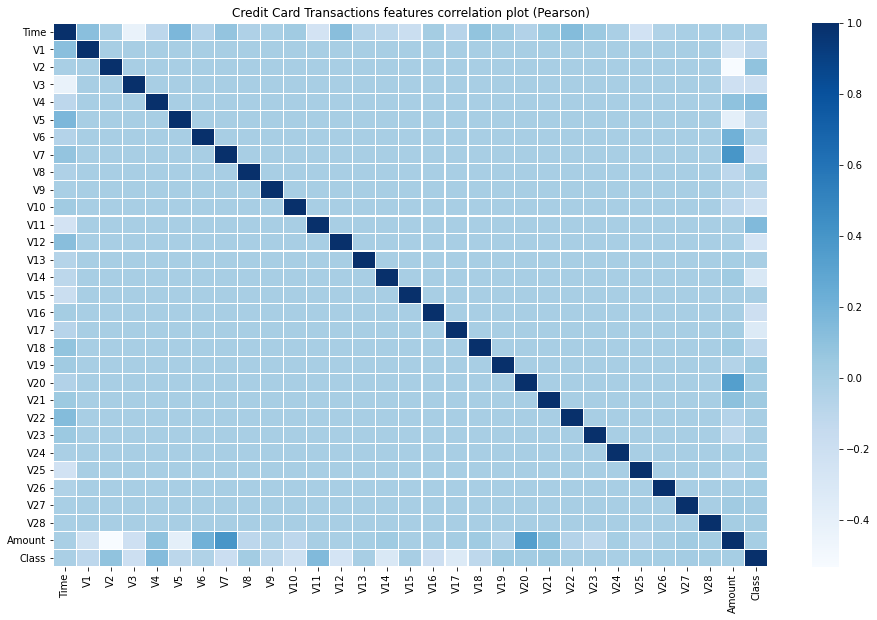

In [12]:
plt.figure(figsize = (16,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

Some variables appear correlated but will test the significance of correlations once new features have been engineered.

## <a id='3.2'>3.2 KDE Plots</a>

Purpose is to see if the distribution of a variable, when stratified by Class, differ significantly from each other. This will provide clues as to which variables are strongly associated with the fraudelent transactions.

<Figure size 432x288 with 0 Axes>

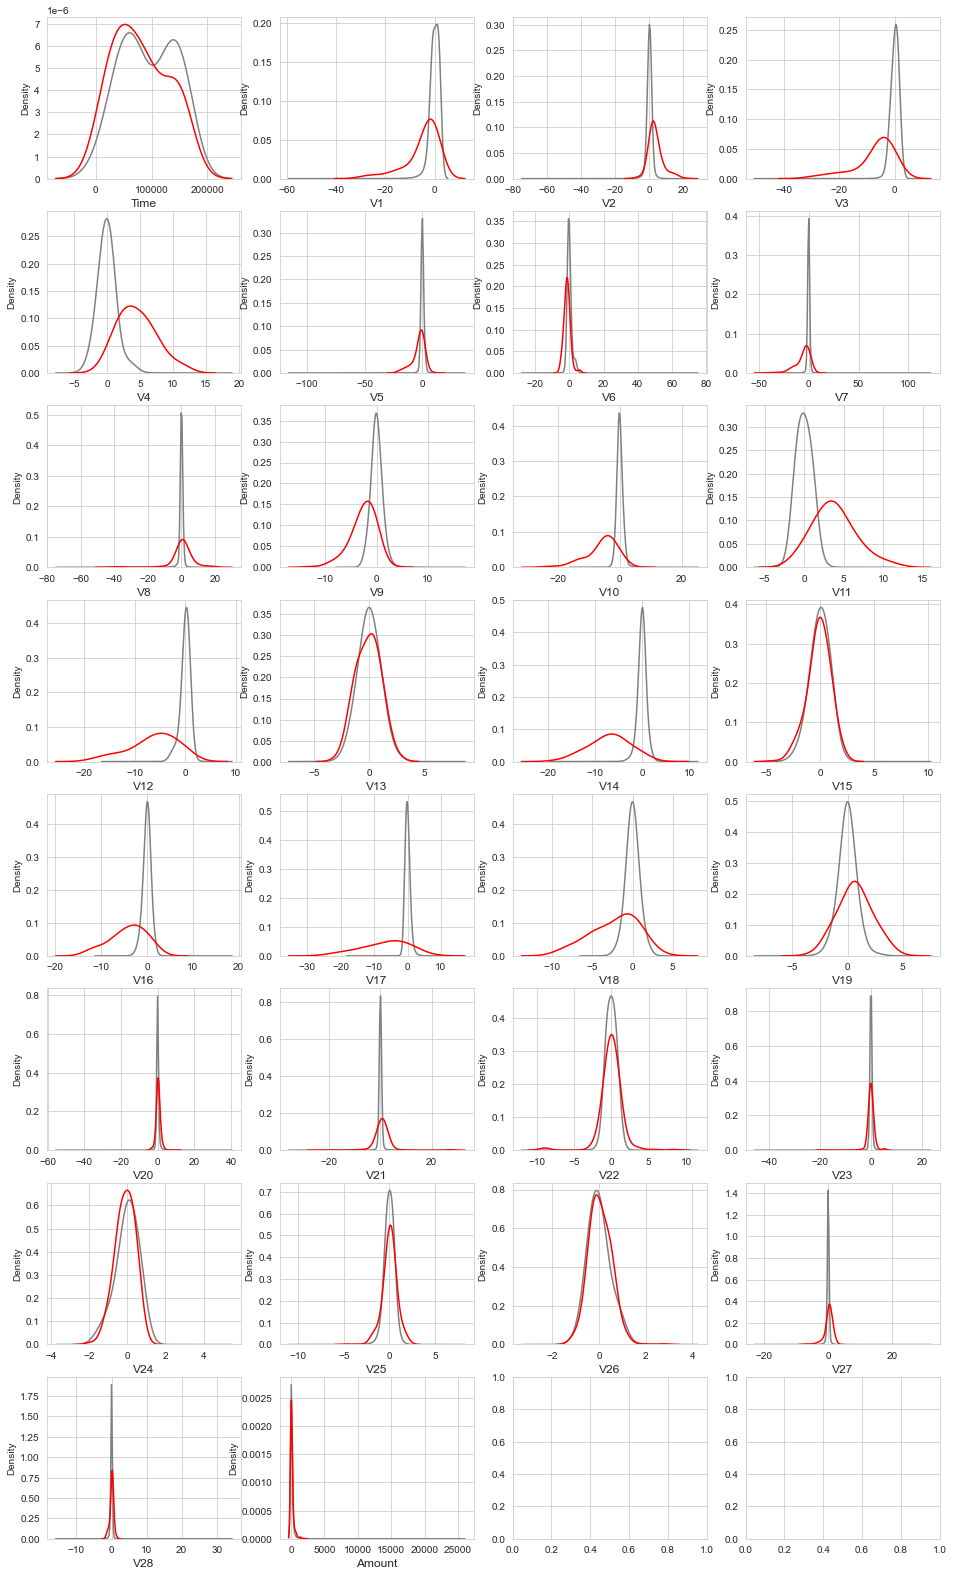

In [13]:
var = data_df.drop(columns=['Class']).columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0", color='grey')
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1", color='red')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.show();

Distributions which look identical across Class: **V13, V15, V24, V25, V26**

# <a id='4.0'>4. Preprocessing</a>

## <a id='4.1'>4.1 Feature Engineering</a>

1. Apply natural logarithm to Amount (since spend amounts are typically skewed left so a log transformation creates a normally distributed variable).
2. Add time of day, expressed in seconds (reseting every day)
3. Time elpased since last fraudelent transaction

In [14]:
# ln_Amount
data_df['ln_Amount'] = np.log(data_df['Amount']+1) #'+1' since minimum value is zero

In [15]:
# Time_of_Day (in seconds)
data_df['Time_of_Day'] = np.mod(data_df['Time'],(60*60*24))

In [16]:
# Time of Last Fraudelent Transaction
data_df['t1'] = data_df.Time.loc[data_df.Class==1].shift()
data_df['t1'] = data_df.t1.fillna(method='ffill')
data_df['Time_Elapsed'] = data_df.Time - data_df.t1
data_df['Time_Elapsed'].fillna(data_df['Time'], inplace=True)

In [17]:
# For those transactions before first fraud
data_df.loc[data_df.Time_Elapsed<0, 'Time_Elapsed'] = -1
data_df = data_df.drop(['t1'], axis=1)

#Transform
data_df['ln_Time_Elapsed'] = np.log(data_df.Time_Elapsed+2)

Understand the distributions of new features.

In [18]:
pd.pivot_table(data_df, values=['Time_of_Day','ln_Amount','Time_Elapsed','ln_Time_Elapsed'], index = 'Class', aggfunc=[np.min,np.max,np.median,np.mean], margins=True).T

Class                              0             1           All
amin   Time_Elapsed         0.000000      0.000000      0.000000
       Time_of_Day          0.000000    406.000000      0.000000
       ln_Amount            0.000000      0.000000      0.000000
       ln_Time_Elapsed      0.693147      0.693147      0.693147
amax   Time_Elapsed      6619.000000   5489.000000   6619.000000
       Time_of_Day      86398.000000  86376.000000  86398.000000
       ln_Amount           10.153941      7.662407     10.153941
       ln_Time_Elapsed      8.798002      8.610866      8.798002
median Time_Elapsed       759.000000    126.000000    758.000000
       Time_of_Day      54051.000000  43388.500000  54039.000000
       ln_Amount            3.135494      2.327270      3.135494
       ln_Time_Elapsed      6.634633      4.852030      6.633318
mean   Time_Elapsed      1063.092475    346.235772   1061.854115
       Time_of_Day      52351.580026  43693.148374  52336.622709
       ln_Amount            3.152762      2.820596      3.152188
       ln_Time_Elapsed      6.519204      4.598160      6.515886

<Figure size 432x288 with 0 Axes>

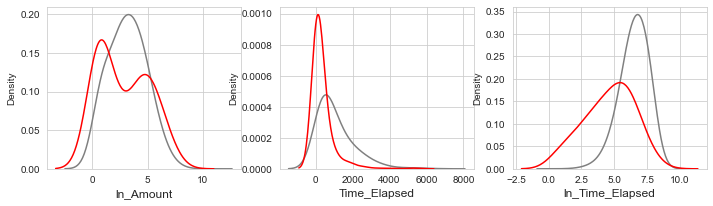

In [19]:
i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(1,3,figsize=(16,28))

for feature in ['ln_Amount','Time_Elapsed','ln_Time_Elapsed']:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0", color='grey')
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1", color='red')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.show();

A clear **bimodal distribution for ln_Amount** for fraudelent transactions compared to non-fraudelent transactions. Also, right to transform time elapsed to get a more normally distributed variable with ln_Time_Elapsed.

From distribution of ln_Time_Elapsed, fraudelent transactions have a much shorter time between successively fraudelent transactions (somewhat expected).

How are fraudelent transactions timed throughout the day compared to non-fraudelent transactions?

(0.0, 172792.0)

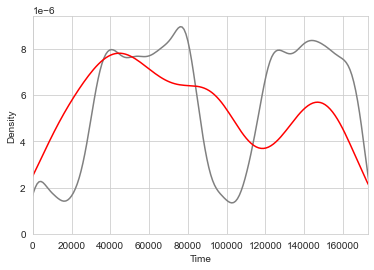

In [20]:
sns.kdeplot(data=data_df.loc[data_df['Class']==0]['Time'],label='No Fraud', color='grey')
sns.kdeplot(data=data_df.loc[data_df['Class']==1]['Time'],label='Fraud', color = 'red')
plt.xlabel('Time')
plt.xlim(min(data_df.Time),max(data_df.Time))

Evidence of fradulent transactions happening at a time (peak at around 10,000 seconds) when non-fraudelent transactions are at a low. Safe to assume this is late night/early morning when majority of people are asleep.

## <a id='4.2'>4.2 Secondary Exploratory Analysis and Signifance Testing</a>

With new features engineered, want to conduct a similar exploratory analysis and do some testing of correlations and differences in distribution means to indicate if any dimensionality reduction is needed and which variables are good candidates to include in a classification model.

In [21]:
data_df2 = data_df.drop(columns=['Time','Amount','Time_Elapsed'])

### <a id='4.2.1'>4.2.1 Correlations</a>

In [22]:
pearson_df =  pd.DataFrame(columns=['variable_1','variable_2','pearson_r','pvalue'])
alpha_pr = 0.05
no_of_comparisons = (data_df2.shape[1]*data_df2.shape[1]/2)-data_df2.shape[1]
bonferroni_pr = alpha_pr / no_of_comparisons
for i in data_df2.loc[:, data_df2.columns != 'Class']:
    for j in data_df2.loc[:, data_df2.columns != 'Class']:
        if i != j:
            variable_i = i
            variable_j = j
            pearson_r = scipy.stats.pearsonr(data_df2[i],data_df2[j])[0]
            pvalue = scipy.stats.pearsonr(data_df2[i],data_df2[j])[1]
            if pvalue < bonferroni_pr:
                new_row = {'variable_1': variable_i, 'variable_2': variable_j, \
                           'pearson_r': pearson_r, 'pvalue': pvalue}
                pearson_df = pearson_df.append(new_row, ignore_index=True)
pearson_df.sort_values('pearson_r')
# Drop Duplicates
pearson_df['temp'] = pearson_df.loc[:,'variable_1':'variable_2'].min(axis=1)+pearson_df.loc[:,'variable_1':'variable_2'].max(axis=1)
pearson_df = pearson_df.drop_duplicates(subset=['temp'])
pearson_df = pearson_df.drop(columns=['temp'])

# Top 5 Direct Correlations
print("Top 5 Direct Correlations")
print(pearson_df.loc[pearson_df.pearson_r>0,:].nlargest(5,'pearson_r'))
print()

# Top 5 Inverse Correlations
print("Top 5 Inverse Correlations")
print(pearson_df.loc[pearson_df.pearson_r<0,:].nsmallest(5,'pearson_r'))

Top 5 Direct Correlations
   variable_1   variable_2  pearson_r  pvalue
30        V12  Time_of_Day   0.353425     0.0
12         V6    ln_Amount   0.163822     0.0
49        V20    ln_Amount   0.144731     0.0
38        V15  Time_of_Day   0.111619     0.0
14         V7    ln_Amount   0.095758     0.0

Top 5 Inverse Correlations
   variable_1   variable_2  pearson_r  pvalue
2          V2    ln_Amount  -0.450317     0.0
9          V5    ln_Amount  -0.286189     0.0
21         V9  Time_of_Day  -0.190872     0.0
32        V13  Time_of_Day  -0.188508     0.0
35        V14  Time_of_Day  -0.163408     0.0


Scope for dimensionality reduction.

### <a id='4.2.2'>4.2.2 T Testing</a>

In [23]:
from scipy import stats

ttest_df =  pd.DataFrame(columns=['variable','statistic','pvalue'])
alpha = 0.05
bonferroni = alpha / (data_df2.shape[1]-1) #Bonferroni correction '-1' to exclude Class 
for i in data_df2.loc[:, data_df2.columns != 'Class']:
    pvalue = stats.ttest_ind(data_df2.loc[data_df2['Class']==0, [i]], data_df2.loc[data_df2['Class']==1, [i]], equal_var=False, nan_policy='omit')[1]
    if pvalue <= bonferroni:
        new_row = {'variable':i, 'statistic':stats.ttest_ind(data_df2.loc[data_df2['Class']==0, [i]], data_df2.loc[data_df2['Class']==1, [i]], equal_var=False, nan_policy='omit')[0], \
                   'pvalue':pvalue}
        ttest_df = ttest_df.append(new_row, ignore_index=True)
ttest_df.sort_values('pvalue')

,variable,statistic,pvalue
11,V14,[36.201024075996244],[1.0401507099025376e-140]
3,V4,[-35.11644940739403],[4.587316921388562e-136]
9,V11,[-31.519223172648527],[4.577212375356592e-120]
10,V12,[29.88002649494514],[1.4813165028380743e-112]
8,V10,[25.75526028732098],[3.382883650613494e-93]
12,V16,[23.798892084037867],[7.905325639437749e-84]
21,ln_Time_Elapsed,[23.06833753095246],[2.465128680633529e-80]
7,V9,[22.928480841254068],[1.1935046623364764e-79]
2,V3,[21.976004399367977],[4.7860814074282e-75]
13,V17,[21.247726971069667],[1.5580938057841998e-71]


22 variables, from a possible 30 (explanatory), appear good candidates to include in a classification model.

## <a id='4.3'>4.3 Dimensionality Reduction</a>

Purpose here is to understand if there is further scope for reducing the feature set further (with the addition of the new features engineered). All variables are continuous and so PCA is a suitable technique to reduce the feature set. I will be using features with an asbolute correlation of >= 0.2 as candidates for PCA.

In [24]:
from numpy import array
pca_candidate_features = pd.concat([pearson_df.loc[abs(pearson_df.pearson_r)>0.2,'variable_1'], \
              pearson_df.loc[abs(pearson_df.pearson_r)>0.2,'variable_2']])
pca_candidate_features = pca_candidate_features.drop_duplicates()
pca_candidate_features=array(pca_candidate_features)
#pca_candidate_features=pca_candidate_features[pca_candidate_features != 'Time_of_Day']

In [25]:
from sklearn.decomposition import PCA

x_temp = data_df2[pca_candidate_features]

n_princomp = len(pca_candidate_features)
pca = PCA(n_components=n_princomp, whiten=True)

pca.fit(x_temp)
principal_components_x = pca.fit_transform(x_temp)

In [26]:
pd.DataFrame(data=pca.components_, columns=x_temp.columns)

,V2,V5,V12,ln_Amount,Time_of_Day
0,-6.161335e-07,0.000002,-0.000017,0.000002,-1.000000
1,-6.593830e-01,-0.218071,-0.004074,0.719474,0.000001
2,5.545126e-01,-0.787148,-0.016474,0.269524,-0.000001
3,-5.075260e-01,-0.576879,0.011195,-0.639924,-0.000002
4,-1.213234e-02,0.007399,-0.999793,-0.014538,0.000017


In [27]:
print(pca.explained_variance_ratio_)

[9.99999981e-01 9.18671008e-09 4.80135448e-09 2.65158265e-09
 1.97090014e-09]


In [28]:
principal_X_df = pd.DataFrame(data = principal_components_x[:,0:2]
             , columns = ['new_prinComp_1','new_prinComp_2'])

In [29]:
data_df3 = pd.concat([data_df2,principal_X_df], axis=1)

<Figure size 432x288 with 0 Axes>

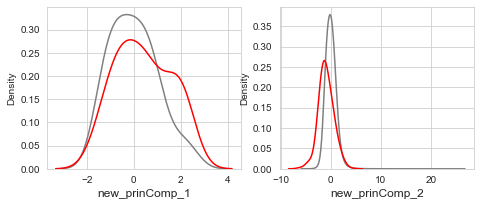

In [30]:
i = 0
t0 = data_df3.loc[data_df3['Class'] == 0]
t1 = data_df3.loc[data_df3['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(16,28))

for feature in ['new_prinComp_1','new_prinComp_2']:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0", color='grey')
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1", color='red')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.show();

In [31]:
pearson_df2 =  pd.DataFrame(columns=['variable_1','variable_2','pearson_r','pvalue'])
alpha_pr = 0.05
no_of_comparisons = (data_df3.shape[1]*data_df3.shape[1]/2)-data_df3.shape[1]
bonferroni_pr = alpha_pr / no_of_comparisons
for i in data_df3.loc[:, data_df3.columns != 'Class']:
    for j in data_df3.loc[:, data_df3.columns != 'Class']:
        if i != j:
            variable_i = i
            variable_j = j
            pearson_r = scipy.stats.pearsonr(data_df3[i],data_df3[j])[0]
            pvalue = scipy.stats.pearsonr(data_df3[i],data_df3[j])[1]
            if pvalue < bonferroni_pr:
                new_row = {'variable_1': variable_i, 'variable_2': variable_j, \
                           'pearson_r': pearson_r, 'pvalue': pvalue}
                pearson_df2 = pearson_df2.append(new_row, ignore_index=True)
pearson_df2.sort_values('pearson_r')
# Drop Duplicates
pearson_df2['temp'] = pearson_df2.loc[:,'variable_1':'variable_2'].min(axis=1)+pearson_df2.loc[:,'variable_1':'variable_2'].max(axis=1)
pearson_df2 = pearson_df2.drop_duplicates(subset=['temp'])
pearson_df2 = pearson_df2.drop(columns=['temp'])

# Top 5 Direct Correlations
print("Top 5 Direct Correlations")
print(pearson_df2.loc[pearson_df2.pearson_r>0,:].nlargest(5,'pearson_r'))
print()

# Top 5 Inverse Correlations
print("Top 5 Inverse Correlations")
print(pearson_df2.loc[pearson_df2.pearson_r<0,:].nsmallest(5,'pearson_r'))

Top 5 Direct Correlations
    variable_1      variable_2  pearson_r  pvalue
133  ln_Amount  new_prinComp_2   0.876203     0.0
49         V12     Time_of_Day   0.353425     0.0
37          V9  new_prinComp_1   0.190872     0.0
55         V13  new_prinComp_1   0.188508     0.0
20          V6       ln_Amount   0.163822     0.0

Top 5 Inverse Correlations
      variable_1      variable_2  pearson_r  pvalue
156  Time_of_Day  new_prinComp_1  -1.000000     0.0
6             V2  new_prinComp_2  -0.805619     0.0
3             V2       ln_Amount  -0.450317     0.0
51           V12  new_prinComp_1  -0.353425     0.0
19            V5  new_prinComp_2  -0.318758     0.0


In [32]:
from scipy import stats

ttest_df2 =  pd.DataFrame(columns=['variable','statistic','pvalue'])
alpha = 0.05
bonferroni = alpha / (data_df3.shape[1]-1) #Bonferroni correction '-1' to exclude Class 
for i in data_df3.loc[:, data_df3.columns != 'Class']:
    pvalue = stats.ttest_ind(data_df3.loc[data_df3['Class']==0, [i]],
                             data_df3.loc[data_df3['Class']==1, [i]],
                             equal_var=False,
                             nan_policy='omit')[1]
    if pvalue <= bonferroni:
        new_row = {'variable':i, 'statistic':stats.ttest_ind(data_df3.loc[data_df3['Class']==0, [i]],
                                                             data_df3.loc[data_df3['Class']==1, [i]],
                                                             equal_var=False,
                                                             nan_policy='omit')[0], \
                   'pvalue':pvalue}
        ttest_df2 = ttest_df2.append(new_row, ignore_index=True)
ttest_df2.sort_values('pvalue')

,variable,statistic,pvalue
11,V14,[36.201024075996244],[1.0401507099025376e-140]
3,V4,[-35.11644940739403],[4.587316921388562e-136]
9,V11,[-31.519223172648527],[4.577212375356592e-120]
10,V12,[29.88002649494514],[1.4813165028380743e-112]
8,V10,[25.75526028732098],[3.382883650613494e-93]
12,V16,[23.798892084037867],[7.905325639437749e-84]
21,ln_Time_Elapsed,[23.06833753095246],[2.465128680633529e-80]
7,V9,[22.928480841254068],[1.1935046623364764e-79]
2,V3,[21.976004399367977],[4.7860814074282e-75]
13,V17,[21.247726971069667],[1.5580938057841998e-71]


Drop columns replaced by prinComp.

In [33]:
from numpy import array
x_variables = array(ttest_df2.variable)
delete = np.array([x_temp.columns])
x_variables = np.setdiff1d(x_variables, delete)
x_variables

array(['V1', 'V10', 'V11', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V24', 'V3', 'V4', 'V6', 'V7', 'V9', 'ln_Time_Elapsed',
       'new_prinComp_1', 'new_prinComp_2'], dtype=object)

# <a id='5.0'>5. Modeling</a>

Due to the number of features involved, I have chosen against any recursive feature elimination and instead opted for a fixed set of variables since this reduces the complexity of the modeling process to be usable.

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std

## <a id='5.1'>5.1 Cost Function</a>

In [35]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
costs = {
    'avg_fraud_amt': avg_fraud_amt,
    'processing_cost_per_transaction': processing_cost_per_transaction,
} 

def cust_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    
    cost =  fp * costs['processing_cost_per_transaction'] + fn * costs['avg_fraud_amt']
    return cost

custom_score = make_scorer(cust_loss_func, greater_is_better = False)

## <a id='5.2'>5.2 Class Weights</a>

Set appropriate class weights to minimize misclassification costs. 1 false negative (flagging a fraudelent transaction as legitimate) is equal to 64 false positives (flagging a legitimate transaction as fraudelent).

Another way, is to say 1 false positive is equal to 1/64 false negative. So, not too interested in capturing many false positives (since they cost 1/64th of a flase negative) so long as there is a high recall (minimising the number of false negatives)

In [36]:
fraud_weight = round(avg_fraud_amt/processing_cost_per_transaction,1)

## <a id='5.3'>5.3 Models</a>

In [37]:
# Classifiers considered
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [38]:
#create datasets
X = data_df3[x_variables]
y = data_df3['Class']
# configure the cross-validation procedure
n_outer_splits = 10
cv_outer = StratifiedKFold(n_splits=n_outer_splits, shuffle=True, random_state=RANDOM_SEED)
# Scaler
scaler = RobustScaler()
# Factor to generalise cost to a single day
cost_factor = n_outer_splits/2

### <a id='5.3.1'>5.3.1 Naive Bayes</a>

In [39]:
%%time
gnb_clf = GaussianNB()
gnb_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', gnb_clf)
                          ]
                    )
# Unbiased estimate
gnb_scores = cost_factor*cross_val_score(gnb_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1) 
# summarize the estimated performance of the model
print('Total Cost Estimate using Naive Bayes: %.3f (%.3f)' % (mean(gnb_scores), std(gnb_scores)))

Total Cost Estimate using Naive Bayes: -8734.169 (820.936)
Wall time: 3.25 s


### <a id='5.3.2'>5.3.2 Decision Tree </a>

In [40]:
%%time
dt_clf = DecisionTreeClassifier(class_weight={1: fraud_weight, 0:1}, random_state=RANDOM_SEED)
dt_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', dt_clf)
                          ]
                    )
# Unbiased estimate
dt_scores = cost_factor*cross_val_score(dt_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using Decision Tree: %.3f (%.3f)' % (mean(dt_scores), std(dt_scores)))

Total Cost Estimate using Decision Tree: -8746.304 (2332.705)
Wall time: 18.1 s


### <a id='5.3.3'>5.3.3 Logistic Regression</a>

For Logistic Regression, also optimise for hyperparameters.

In [41]:
%%time
n_inner_splits = 3
# enumerate splits
lr_outer_results = list()
for train_ix, test_ix in cv_outer.split(X, y):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=n_inner_splits, shuffle=True, random_state=RANDOM_SEED)
    
    #configure pipeline
    scaler = RobustScaler()
    lr_clf = LogisticRegression(class_weight={1:fraud_weight, 0:1}, random_state=RANDOM_SEED)
    lr_pipeline = Pipeline(steps=[('scaler', scaler),
                               ('clf', lr_clf)
                              ]
                       )
    # hyperparamater options
    c_options = [1
                 , 10
                 , 100
                 , 1000
                ]
    solver_options = ['newton-cg'
                      , 'lbfgs'
                      , 'liblinear'
                     ]
    penalty = ['l2']
    #parameter grid
    param_grid = [
        {
        'clf__C': c_options,
        'clf__solver': solver_options,
        'clf__penalty': penalty
        }
    ]
    # define search
    search = GridSearchCV(estimator=lr_pipeline,
                          param_grid=param_grid,
                          scoring=custom_score,
                          cv=cv_inner,
                          refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model (generalising to one day)
    total_cost = -cost_factor*cust_loss_func(y_test, yhat)
    # store the result
    lr_outer_results.append(total_cost)
    # report progress
    #print('>total cost=%.3f, est=%.3f, cfg=%s' % (total_cost, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Total Cost using Logistic Regression: %.3f (%.3f)' % (mean(lr_outer_results), std(lr_outer_results)))

Total Cost using Logistic Regression: -4841.773 (1047.985)
Wall time: 6min 20s


### <a id='5.3.4'>5.3.4 Support Vector Classifier</a>

In [42]:
%%time
svc_clf = SVC(class_weight={1: fraud_weight, 0:1}, random_state=RANDOM_SEED)
svc_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', svc_clf)
                          ]
                    )
# Unbiased estimate
svc_scores = cost_factor*cross_val_score(svc_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using SVC: %.3f (%.3f)' % (mean(svc_scores), std(svc_scores)))

Total Cost Estimate using SVC: -7026.652 (1161.036)
Wall time: 5min 4s


### <a id='5.3.5'>5.3.5 XGBoost Classifier</a>

In [43]:
%%time
xgb_clf = XGBClassifier(class_weight={1: fraud_weight, 0:1}, random_state=RANDOM_SEED)
xgb_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', xgb_clf)
                          ]
                    )
# Unbiased estimate
xgb_scores = cost_factor*cross_val_score(xgb_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using XGBoost: %.3f (%.3f)' % (mean(xgb_scores), std(xgb_scores)))

Total Cost Estimate using XGBoost: -6436.380 (919.625)
Wall time: 3min 30s


### <a id='5.3.6'>5.3.6 Random Forest</a>

In [44]:
%%time
rf_clf = RandomForestClassifier(class_weight={1: fraud_weight, 0:1},random_state=RANDOM_SEED)
rf_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', rf_clf)
                          ]
                    )
# Unbiased estimate
rf_scores = cost_factor*cross_val_score(rf_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using Random Forest: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))

Total Cost Estimate using Random Forest: -6739.010 (1094.811)
Wall time: 5min 22s


### <a id='5.3.7'>5.3.7 Simple Neural Network (Perceptron)</a>

In [45]:
%%time
perc_clf = Perceptron(class_weight={1: fraud_weight, 0:1},random_state=RANDOM_SEED)
perc_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', perc_clf)
                          ]
                    )
# Unbiased estimate
perc_scores = cost_factor*cross_val_score(perc_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using Perceptron: %.3f (%.3f)' % (mean(perc_scores), std(perc_scores)))

Total Cost Estimate using Perceptron: -7652.998 (3633.280)
Wall time: 2.58 s


### <a id='5.3.8'>5.3.8 K Nearest Neighbours </a>

In [46]:
%%time
knn_clf = KNeighborsClassifier()
knn_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', knn_clf)
                          ]
                    )
# Unbiased estimate
knn_scores = cost_factor*cross_val_score(knn_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using kNN: %.3f (%.3f)' % (mean(knn_scores), std(knn_scores)))

Total Cost Estimate using kNN: -6621.629 (1022.811)
Wall time: 4min 36s


### <a id='5.3.9'>5.3.9 AdaBoost</a>

In [47]:
%%time
ada_clf = AdaBoostClassifier(random_state=RANDOM_SEED)
ada_pipeline = Pipeline(steps=[('scaler', scaler),
                           ('clf', ada_clf)
                          ]
                    )
# Unbiased estimate
ada_scores = cost_factor*cross_val_score(ada_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using AdaBoost: %.3f (%.3f)' % (mean(ada_scores), std(ada_scores)))

Total Cost Estimate using AdaBoost: -8515.655 (674.184)
Wall time: 1min 41s


### <a id='5.3.10'>5.3.10 Hard Voting Classifier</a>

In [48]:
%%time
p1 = lr_pipeline
p2 = xgb_pipeline             
p3 = knn_pipeline

vc_pipeline = Pipeline([['clf3', VotingClassifier(estimators=[("p1",p1), ("p2",p2), ("p3",p3)], voting='hard')]])
# Unbiased estimate
vc_scores = cost_factor*cross_val_score(vc_pipeline, X, y, scoring=custom_score, cv=cv_outer, n_jobs=-1)
# summarize the estimated performance of the model
print('Total Cost Estimate using Hard Voting Classifier: %.3f (%.3f)' % (mean(vc_scores), std(vc_scores)))

Total Cost Estimate using Hard Voting Classifier: -5589.594 (889.175)
Wall time: 8min 20s


 ## <a id='5.4'>5.4 Model Summary</a>
 
 Below is the expected cost of fraud, per day, using each of the models.
 
* No Model (€ 30,064)
* Naive Bayes (€ 8,734)
* Decision Tree (€ 8,746)
* **Logistic Regression (€ 4,842)**
* Support Vector Classifier (€ 7,027)
* Xtreme Boosting Gradient (€ 6,436)
* Random Forest (€ 6,739)
* Simple Neural Network (€ 7,653)
* K Nearest Neighbours (€ 6,622)
* AdaBoost (€ 8,516)
* Hard Voting Classifier - Logistic Regression, XGBoost, K Nearest Neighbours (€ 5,590)

Logistic Regression wins out and reduces the cost of fraud per day from € 30,064 to € 4,842, a reduction of **84%**.

# Acknowledgements

In places, I have either used and modified snippets of code from the following notebooks or used them as motivation:

* Preda, G. Credit Card Fraud Detection Predictive Models. Kaggle.com. https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models.

* Teuwens, R. Precision vs. Recall: Optimizing Fraud Costs. Kaggle.com. https://www.kaggle.com/robinteuwens/precision-vs-recall-optimizing-fraud-costs.

* Jee, K. Titanic Project Example. Kaggle.com. https://www.kaggle.com/kenjee/titanic-project-example.